In [84]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.metrics import ndcg_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import warnings
#warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency

In [85]:
df=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\airbnb-recruiting-new-user-bookings\train_users_2.csv")

# Data checking

In [86]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [87]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [88]:
# Display the percentage
total_age_count=df['age'].count()
unknown_Age = df['age'].isnull().sum()
percentage_unknown_Age = (unknown_Age/ total_age_count) * 100

print(f"Percentage of unknown age entries: {percentage_unknown_Age:.2f}%")

Percentage of unknown age entries: 70.13%


 very large portion are unknown so cant be dropped so it was replaced by NaN values where xgboost would handle it


In [89]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [90]:
df.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [91]:
df.drop('id', axis=1, inplace=True)

In [92]:
df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [93]:
df.isnull().sum()

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

date of first booking has 124543 null corrosponding to NDF where no booking has already taken place

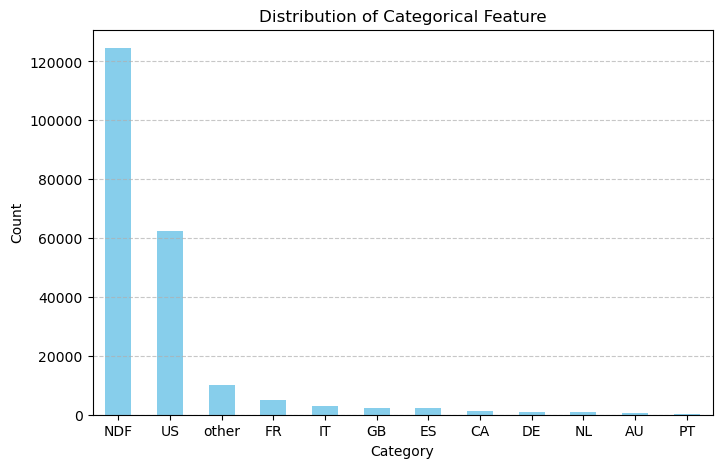

In [94]:

# Count occurrences of each category
category_counts = df['country_destination'].value_counts()

# Plotting

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 most of the data are NDF

# feature engineering 

## XGboost doesn't deal with data in terms of date so for modeling and also for analysis date first book and date of account have been analyzied 

In [95]:
# Convert to datetime
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])

# Extract month and year
df['account_created_month'] = df['date_account_created'].dt.month
df['account_created_year'] = df['date_account_created'].dt.year
df['first_book_month'] = df['date_first_booking'].dt.month
df['first_book_year'] = df['date_first_booking'].dt.year
df['difference_in_months'] = (df['date_first_booking'] - df['date_account_created']) / pd.Timedelta(days=30)

# Display the DataFrame
print(df)


       date_account_created  timestamp_first_active date_first_booking  \
0                2010-06-28          20090319043255                NaT   
1                2011-05-25          20090523174809                NaT   
2                2010-09-28          20090609231247         2010-08-02   
3                2011-12-05          20091031060129         2012-09-08   
4                2010-09-14          20091208061105         2010-02-18   
...                     ...                     ...                ...   
213446           2014-06-30          20140630235636                NaT   
213447           2014-06-30          20140630235719                NaT   
213448           2014-06-30          20140630235754                NaT   
213449           2014-06-30          20140630235822                NaT   
213450           2014-06-30          20140630235824                NaT   

           gender   age signup_method  signup_flow language affiliate_channel  \
0       -unknown-   NaN      f

## Seasonal Trends

In [96]:
df['first_book_month'] = df['first_book_month'].replace('', np.nan)

In [97]:
import pandas as pd
import numpy as np

# Sample DataFrame with 'first book month' column


# Define the mapping of month numbers to seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Map the 'first book month' to seasons
df['season_of_bookings'] = df['first_book_month'].map(season_mapping)

# Display the DataFrame with the new column
print(df)


       date_account_created  timestamp_first_active date_first_booking  \
0                2010-06-28          20090319043255                NaT   
1                2011-05-25          20090523174809                NaT   
2                2010-09-28          20090609231247         2010-08-02   
3                2011-12-05          20091031060129         2012-09-08   
4                2010-09-14          20091208061105         2010-02-18   
...                     ...                     ...                ...   
213446           2014-06-30          20140630235636                NaT   
213447           2014-06-30          20140630235719                NaT   
213448           2014-06-30          20140630235754                NaT   
213449           2014-06-30          20140630235822                NaT   
213450           2014-06-30          20140630235824                NaT   

           gender   age signup_method  signup_flow language affiliate_channel  \
0       -unknown-   NaN      f

In [98]:
df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings
0,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,NDF,6,2010,NaN,NaN,NaN,NaN
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,NDF,5,2011,NaN,NaN,NaN,NaN
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,US,9,2010,8.0,2010.0,-1.900000,Summer
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,other,12,2011,9.0,2012.0,9.266667,Fall
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,US,9,2010,2.0,2010.0,-6.933333,Winter


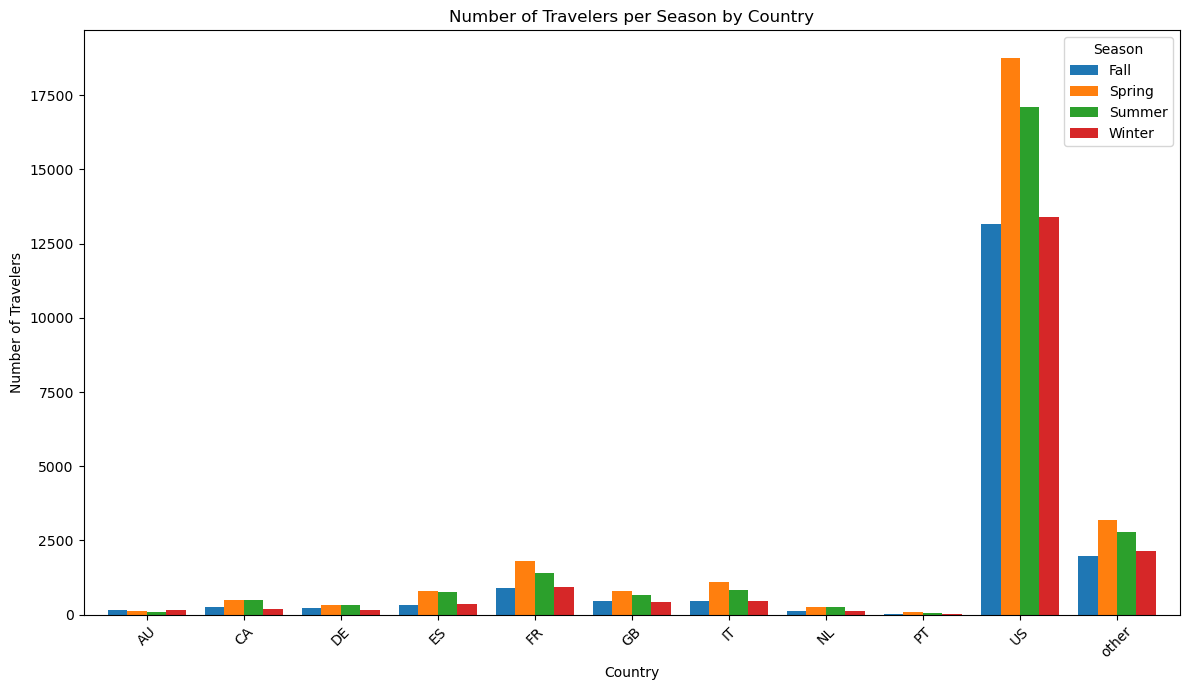

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming frequency_count DataFrame is already created
frequency_count = df.groupby(['country_destination', 'season_of_bookings']).size().unstack(fill_value=0)

# Create a grouped bar chart for frequency of seasons by country
frequency_count.plot(kind='bar', figsize=(12, 7), width=0.8)

# Adding labels and title
plt.title('Number of Travelers per Season by Country')
plt.xlabel('Country')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=45)
plt.legend(title='Season')

# Show the plot
plt.tight_layout()
plt.show()


## Age preprocessing

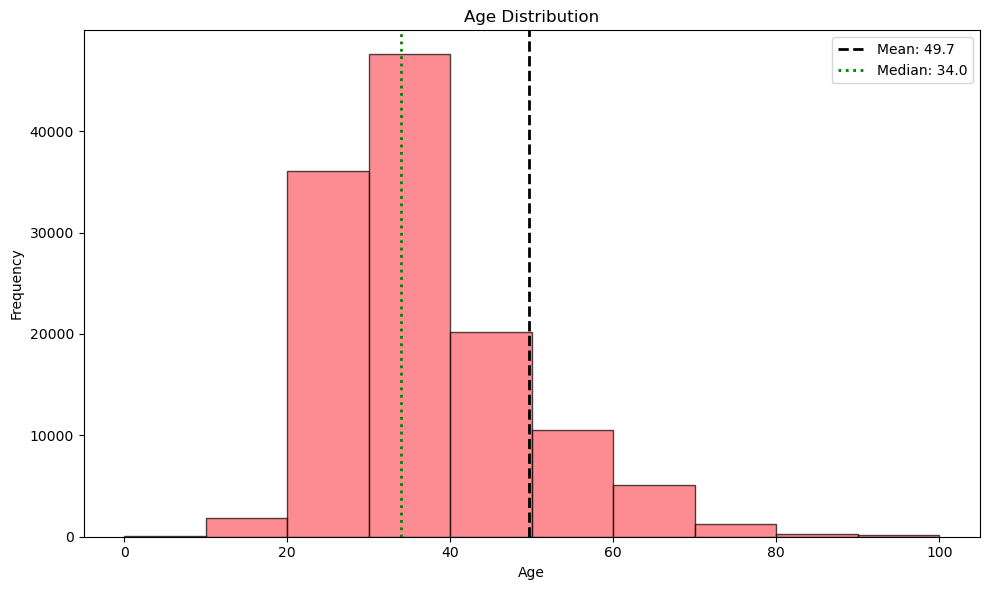

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and median ages
mean_age = df['age'].mean()
median_age = df['age'].median()

# Define custom bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram for age distribution with custom bins
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bins, color='#FD5C64', alpha=0.7, edgecolor='black')

# Adding mean and median lines
plt.axvline(mean_age, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle=':', linewidth=2, label=f'Median: {median_age:.1f}')

# Adding labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Remove outliners

In [101]:
import pandas as pd


# Display original DataFrame
print("Original DataFrame:")
print(df)

# Filter the DataFrame to keep ages between 15 and 85, including nulls
filtered_df = df[((df['age'].isnull()) | (df['age'] >= 10) & (df['age'] <= 85))]

# Display filtered DataFrame
print("\nFiltered DataFrame (age between 15 and 85, keeping nulls):")
print(filtered_df)


Original DataFrame:
       date_account_created  timestamp_first_active date_first_booking  \
0                2010-06-28          20090319043255                NaT   
1                2011-05-25          20090523174809                NaT   
2                2010-09-28          20090609231247         2010-08-02   
3                2011-12-05          20091031060129         2012-09-08   
4                2010-09-14          20091208061105         2010-02-18   
...                     ...                     ...                ...   
213446           2014-06-30          20140630235636                NaT   
213447           2014-06-30          20140630235719                NaT   
213448           2014-06-30          20140630235754                NaT   
213449           2014-06-30          20140630235822                NaT   
213450           2014-06-30          20140630235824                NaT   

           gender   age signup_method  signup_flow language affiliate_channel  \
0       -u

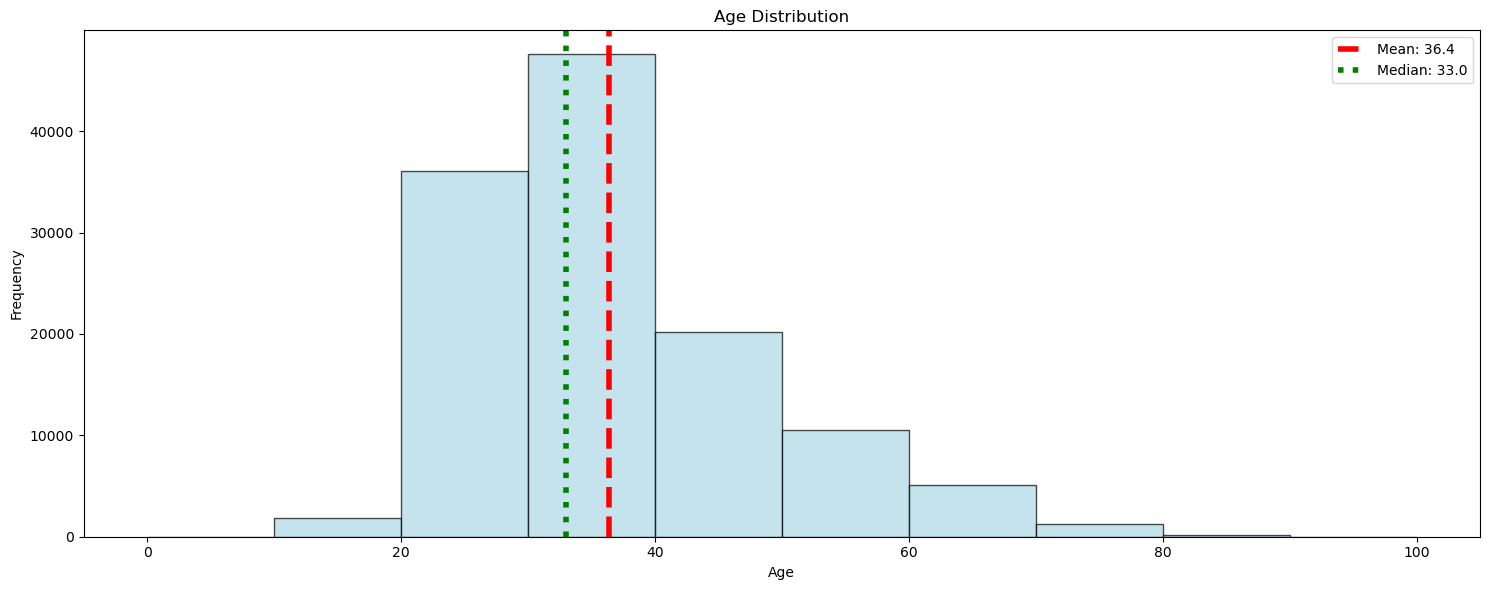

In [102]:
mean_age = filtered_df['age'].mean()
median_age = filtered_df['age'].median()

# Define custom bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram for age distribution with custom bins
plt.figure(figsize=(15, 6))
plt.hist(filtered_df['age'], bins=bins, color='lightblue', alpha=0.7, edgecolor='black')

# Adding mean and median lines
plt.axvline(mean_age, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle=':', linewidth=4, label=f'Median: {median_age:.1f}')

# Adding labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### groups Division

In [103]:
filtered_df['Age Group'] = filtered_df['age'].apply(lambda x: 'Greater than 37' if x > 37 else 'Less than or equal to 37')

C:\Users\engmo\AppData\Local\Temp\ipykernel_36848\3778818991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = filtered_df['age'].apply(lambda x: 'Greater than 37' if x > 37 else 'Less than or equal to 37')


In [104]:
filtered_df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings,Age Group
0,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,...,Mac Desktop,Chrome,NDF,6,2010,NaN,NaN,NaN,NaN,Less than or equal to 37
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,...,Mac Desktop,Chrome,NDF,5,2011,NaN,NaN,NaN,NaN,Greater than 37
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Windows Desktop,IE,US,9,2010,8.0,2010.0,-1.900000,Summer,Greater than 37
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Mac Desktop,Firefox,other,12,2011,9.0,2012.0,9.266667,Fall,Greater than 37
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Mac Desktop,Chrome,US,9,2010,2.0,2010.0,-6.933333,Winter,Greater than 37


In [105]:
bins = [-12, 0, 1, 2, 3, 4, 5, 6, 12]  # Adjust bins as necessary
labels = ['< 0', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-12']

# Create a new column with binned data
filtered_df['BinnedMonths'] = pd.cut(filtered_df['difference_in_months'], bins=bins, labels=labels, right=False)

C:\Users\engmo\AppData\Local\Temp\ipykernel_36848\1258350426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BinnedMonths'] = pd.cut(filtered_df['difference_in_months'], bins=bins, labels=labels, right=False)


In [106]:
filtered_df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_browser,country_destination,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings,Age Group,BinnedMonths
0,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,...,Chrome,NDF,6,2010,NaN,NaN,NaN,NaN,Less than or equal to 37,NaN
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,...,Chrome,NDF,5,2011,NaN,NaN,NaN,NaN,Greater than 37,NaN
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,IE,US,9,2010,8.0,2010.0,-1.900000,Summer,Greater than 37,< 0
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Firefox,other,12,2011,9.0,2012.0,9.266667,Fall,Greater than 37,6-12
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Chrome,US,9,2010,2.0,2010.0,-6.933333,Winter,Greater than 37,< 0


# cheking for the features relevance with the country_destination

In [107]:
categorical_features = ['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','season_of_bookings']

def chi_squared_by_feature(df, features, target):
    results = {}
    
    for feature in features:
        contingency_table = pd.crosstab(df[feature], df[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results[feature] = {'Chi-Squared': chi2, 'p-value': p}
    
    return results

# Get results for features
results = chi_squared_by_feature(filtered_df, categorical_features, 'country_destination')

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                         Chi-Squared        p-value
gender                   9745.519790   0.000000e+00
signup_method             283.940712   2.171438e-47
language                  910.999350   4.567894e-72
affiliate_channel        2380.800808   0.000000e+00
affiliate_provider       1468.568791  1.502248e-197
first_affiliate_tracked   873.468827  2.681652e-141
signup_app               2759.454529   0.000000e+00
first_device_type        3767.803955   0.000000e+00
first_browser            4219.652949   0.000000e+00
season_of_bookings        543.450539   1.417455e-95


In [108]:
#filtered_df.to_excel('analysis.xlsx', index=False)

In [109]:
filtered_df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_browser,country_destination,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings,Age Group,BinnedMonths
0,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,...,Chrome,NDF,6,2010,NaN,NaN,NaN,NaN,Less than or equal to 37,NaN
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,...,Chrome,NDF,5,2011,NaN,NaN,NaN,NaN,Greater than 37,NaN
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,IE,US,9,2010,8.0,2010.0,-1.900000,Summer,Greater than 37,< 0
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Firefox,other,12,2011,9.0,2012.0,9.266667,Fall,Greater than 37,6-12
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Chrome,US,9,2010,2.0,2010.0,-6.933333,Winter,Greater than 37,< 0


# Modeling stage

In [110]:
train1_df=filtered_df.drop(columns=['date_account_created', 'date_first_booking','Age Group'])

In [111]:
train1_df.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings,BinnedMonths
0,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,6,2010,NaN,NaN,NaN,NaN,NaN
1,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,5,2011,NaN,NaN,NaN,NaN,NaN
2,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,2010,8.0,2010.0,-1.900000,Summer,< 0
3,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,2011,9.0,2012.0,9.266667,Fall,6-12
4,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,2010,2.0,2010.0,-6.933333,Winter,< 0


In [112]:
x=train1_df.drop(columns=['country_destination','BinnedMonths'])


In [113]:
y=train1_df['country_destination']

In [114]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)
object_cols = x.select_dtypes(include=['object']).columns
x[object_cols] = x[object_cols].astype('category')

Categorical Columns:
['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'season_of_bookings']


In [115]:
#categorical_cols2 = x2.select_dtypes(include=['object']).columns.tolist()

#print("Categorical Columns:")
#print(categorical_cols2)
#object_cols = x2.select_dtypes(include=['object']).columns
#x2[object_cols] = x2[object_cols].astype('category')

In [116]:
x.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings
0,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,6,2010,NaN,NaN,NaN,NaN
1,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,5,2011,NaN,NaN,NaN,NaN
2,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,9,2010,8.0,2010.0,-1.900000,Summer
3,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,12,2011,9.0,2012.0,9.266667,Fall
4,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,9,2010,2.0,2010.0,-6.933333,Winter


In [117]:
#x = pd.get_dummies(x, drop_first=True)

In [118]:
#x.head()

## parameters preparation
 important note manual applying includes transforming x to one hot encoding  but this is not needed as there is a new feature in xgboosting which is enable categorical that can handle inputs with categoricgal features but on the other hand for the multiple classification 

 it's a must to use label encoding to be able to use multiple classification as it can't neither be handled directly or even one hot encoded :) 

In [119]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

## training and checking score

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Assuming train1_df is already defined and contains the necessary data

# Define features and target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=42)

# Initialize the model
model = XGBClassifier(
    objective='multi:softmax',  
    num_class=13,  
    max_depth=8,
    learning_rate=0.1,  
    n_estimators=100,  
    eval_metric='mlogloss',  
    enable_categorical=True 
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)# use _proba to get probabilities instead of classifications

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
probabilities=model.predict_proba(X_test)

# Display probabilities
print("Probabilities:\n", probabilities)
y_bin=pd.get_dummies(y_test)
print (y_bin)
ndcg = ndcg_score(y_bin, probabilities, k=5)# it needs features in one hot encoded form and it needs probabilities corroespondig to each feature
print(f'NDCG@5 Score: {ndcg}')

Accuracy: 87.61%
Probabilities:
 [[2.1294978e-02 1.6723696e-02 4.7090419e-02 ... 1.5002396e-03
  6.6446674e-01 1.3346848e-01]
 [9.1408701e-06 8.3001796e-06 8.4175435e-06 ... 7.7047735e-06
  5.4779903e-06 7.7538725e-06]
 [9.2943519e-06 8.7198259e-06 8.7959907e-06 ... 8.7527451e-06
  1.8807545e-05 7.7537698e-06]
 ...
 [1.4825312e-03 5.3596489e-02 2.0390278e-02 ... 3.3761035e-03
  7.9225856e-01 2.9800395e-02]
 [8.9938967e-06 8.3835212e-06 8.3625600e-06 ... 7.7336317e-06
  9.2448208e-06 7.7538516e-06]
 [9.5891783e-06 8.2480565e-06 8.2802035e-06 ... 7.6631823e-06
  5.4779975e-06 7.7538825e-06]]
       0   1   2   3   4   5   6   7   8   9   10  11
0       0   0   0   0   0   0   0   0   0   0   0   1
1       0   0   0   0   0   0   0   1   0   0   0   0
2       0   0   0   0   0   0   0   1   0   0   0   0
3       0   0   0   0   0   0   0   1   0   0   0   0
4       0   0   0   0   0   0   0   0   0   0   1   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
63220   0   0   0   0   0

# Testing stage

In [121]:
test=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\airbnb-recruiting-new-user-bookings\test_users.csv")

## feature engineering

In [122]:
test=test.drop(columns=['id'])

In [123]:
test['date_account_created'] = pd.to_datetime(df['date_account_created'])
test['date_first_booking'] = pd.to_datetime(df['date_first_booking'])

# Extract month and year
test['account_created_month'] = test['date_account_created'].dt.month
test['account_created_year'] = test['date_account_created'].dt.year
test['first_book_month'] = test['date_first_booking'].dt.month
test['first_book_year'] = test['date_first_booking'].dt.year
test['difference_in_months'] = (test['date_first_booking'] - test['date_account_created']) / pd.Timedelta(days=30)

In [124]:
test['first_book_month'] = test['first_book_month'].replace('', np.nan)

In [125]:
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Map the 'first book month' to seasons
test['season_of_bookings'] = test['first_book_month'].map(season_mapping)

# Display the DataFrame with the new column
print(test)


      date_account_created  timestamp_first_active date_first_booking  \
0               2010-06-28            2.014070e+13                NaT   
1               2011-05-25            2.014070e+13                NaT   
2               2010-09-28            2.014070e+13         2010-08-02   
3               2011-12-05            2.014070e+13         2012-09-08   
4               2010-09-14            2.014070e+13         2010-02-18   
...                    ...                     ...                ...   
62091           2013-02-25            2.014093e+13                NaT   
62092           2013-02-25            2.014093e+13                NaT   
62093           2013-02-25            2.014093e+13         2013-02-25   
62094           2013-02-25            2.014093e+13                NaT   
62095           2013-02-25            2.014093e+13                NaT   

          gender   age signup_method  signup_flow language affiliate_channel  \
0         FEMALE  35.0      facebook       

In [126]:
test=test.drop(columns=['date_first_booking','date_account_created'])

In [127]:
categorical_cols3 = test.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols3)
object_cols = test.select_dtypes(include=['object']).columns
test[object_cols] = test[object_cols].astype('category')

Categorical Columns:
['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'season_of_bookings']


In [128]:
test.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings
0,2.014070e+13,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,6,2010,NaN,NaN,NaN,NaN
1,2.014070e+13,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,5,2011,NaN,NaN,NaN,NaN
2,2.014070e+13,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,9,2010,8.0,2010.0,-1.900000,Summer
3,2.014070e+13,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,12,2011,9.0,2012.0,9.266667,Fall
4,2.014070e+13,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,9,2010,2.0,2010.0,-6.933333,Winter


In [129]:
x.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_month,account_created_year,first_book_month,first_book_year,difference_in_months,season_of_bookings
0,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,6,2010,NaN,NaN,NaN,NaN
1,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,5,2011,NaN,NaN,NaN,NaN
2,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,9,2010,8.0,2010.0,-1.900000,Summer
3,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,12,2011,9.0,2012.0,9.266667,Fall
4,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,9,2010,2.0,2010.0,-6.933333,Winter


## predicting

In [130]:
probabilities_test=model.predict_proba(test)

In [131]:
print (probabilities_test)

[[9.3582466e-06 1.0316459e-05 8.1773360e-06 ... 7.6619071e-06
  1.8428860e-05 9.4041961e-06]
 [8.4880448e-06 9.5366877e-06 7.5906746e-06 ... 7.6496544e-06
  1.8484883e-05 9.4042116e-06]
 [1.9709811e-02 8.5809454e-03 8.9900615e-03 ... 2.0763688e-03
  1.8265902e-01 4.6107924e-01]
 ...
 [5.1646689e-03 1.2751172e-02 1.2668261e-02 ... 1.0902145e-03
  2.4948917e-01 4.6290940e-01]
 [8.6406853e-06 8.8130319e-06 8.6473710e-06 ... 7.5408825e-06
  9.5192236e-06 7.7538634e-06]
 [8.7870849e-06 8.7353583e-06 9.4916040e-06 ... 8.2071574e-06
  7.0060287e-06 8.5683369e-06]]


In [132]:
pred=model.predict(test)

In [133]:
print(pred)

[ 7  7 11 ... 11  7  7]


In [134]:
predicted_labels =le_target.inverse_transform(pred)
print (predicted_labels)

['NDF' 'NDF' 'other' ... 'other' 'NDF' 'NDF']
